# Data Preprocessing , Data Exploration & Time Series Analysis


### Import Libraries & Data Loading

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm

In [3]:
# Data Loading

df_16_17 = pd.read_csv('Lug2016_Giu2017.csv')
df_17_18 = pd.read_csv('Lug2017_Giu2018.csv')
df_18_19 = pd.read_csv('Lug2018_Giu2019.csv')
df_19_20 = pd.read_csv('Lug2019_Giu2020.csv')


df_19_20

,Time,Power
0,01/07/2019 00:00,601.0
1,01/07/2019 00:00,601.0
2,01/07/2019 00:01,625.0
3,01/07/2019 00:01,577.0
4,01/07/2019 00:02,577.0
...,...,...
998545,30/06/2020 23:57,2490.0
998546,30/06/2020 23:58,2490.0
998547,30/06/2020 23:58,2490.0
998548,30/06/2020 23:59,2490.0


### Data Exploration & Preprocessing 

In [4]:
# THE FOLLOWING CHUNK IS NEEDED FOR SESONAL_DECOMPOSER, RUN JUST ONE TIME

# Now we want to apply some changes to the data in order to apply after the seasonal decomposition and better analyze the data


# set time as index 
df_16_17.set_index("Time",inplace=True)
df_16_17.dropna(inplace=True)

# set the index as type datetime
df_16_17.index=pd.to_datetime(df_16_17.index, format='%d/%m/%Y %H:%M')

# set time as index 
df_17_18.set_index("Time",inplace=True)
df_17_18.dropna(inplace=True)

# set the index as type datetime
df_17_18.index=pd.to_datetime(df_17_18.index, format='%d/%m/%Y %H:%M')

# set time as index 
df_18_19.set_index("Time",inplace=True)
df_18_19.dropna(inplace=True)

# set the index as type datetime
df_18_19.index=pd.to_datetime(df_18_19.index, format='%d/%m/%Y %H:%M')

# set time as index 
df_19_20.set_index("Time",inplace=True)
df_19_20.dropna(inplace=True)

# set the index as type datetime
df_19_20.index=pd.to_datetime(df_19_20.index, format='%d/%m/%Y %H:%M')

In [5]:
# It seems like data are duplicated by Time value, in order to have a single value per time point:  
# data have been grouped by time and averaged so that duplicates are aggregated in a less "information loss" way

df_16_17 = df_16_17.groupby('Time').mean()
df_17_18 = df_17_18.groupby('Time').mean()
df_18_19 = df_18_19.groupby('Time').mean()
df_19_20 = df_19_20.groupby('Time').mean()

print(df_16_17.head())
print(df_17_18.head())
print(df_18_19.head())
print(df_19_20.head())

                     Power
Time                      
1904-01-01 01:00:00    0.0
2016-07-01 00:00:00    0.0
2016-07-01 00:01:00    0.0
2016-07-01 00:02:00    0.0
2016-07-01 00:03:00    0.0
                      Power
Time                       
1904-01-01 01:00:00     0.0
2017-07-01 00:00:00  2657.5
2017-07-01 00:01:00  2627.0
2017-07-01 00:02:00  2402.0
2017-07-01 00:03:00  2461.5
                      Power
Time                       
2018-07-01 00:00:00  2556.5
2018-07-01 00:01:00  2619.0
2018-07-01 00:02:00  2609.0
2018-07-01 00:03:00  2606.0
2018-07-01 00:04:00  2611.0
                     Power
Time                      
1904-01-01 01:00:00    0.0
2019-07-01 00:00:00  601.0
2019-07-01 00:01:00  601.0
2019-07-01 00:02:00  577.0
2019-07-01 00:03:00  589.0


In [6]:
# Since after the groupBy data are ordered, we can instantly spot that there is a wrong data point
# that is 1904-01-01 01:00:00, for almost all the dataset
# So we procede by dropping them

df_16_17 = df_16_17.drop(index = pd.Timestamp('1904-01-01 01:00:00'))
df_17_18 = df_17_18.drop(index = pd.Timestamp('1904-01-01 01:00:00'))
df_19_20 = df_19_20.drop(index = pd.Timestamp('1904-01-01 01:00:00'))

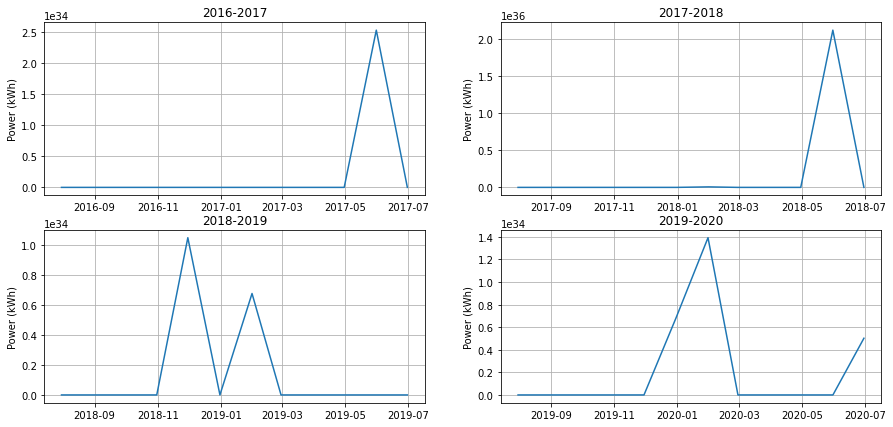

In [7]:
df_16_17_month = df_16_17.groupby(pd.Grouper(level='Time',freq='M')).mean()
df_17_18_month = df_17_18.groupby(pd.Grouper(level='Time',freq='M')).mean()
df_18_19_month = df_18_19.groupby(pd.Grouper(level='Time',freq='M')).mean()
df_19_20_month = df_19_20.groupby(pd.Grouper(level='Time',freq='M')).mean()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

ax[0,0].plot(df_16_17_month)
ax[0,0].set_title('2016-2017')
ax[0,0].set_ylabel('Power (kWh)')
ax[0,0].grid()

ax[0,1].plot(df_17_18_month)
ax[0,1].set_title('2017-2018')
ax[0,1].set_ylabel('Power (kWh)')
ax[0,1].grid()

ax[1,0].plot(df_18_19_month)
ax[1,0].set_title('2018-2019')
ax[1,0].set_ylabel('Power (kWh)')
ax[1,0].grid()
ax[1,1].plot(df_19_20_month)
ax[1,1].set_title('2019-2020')
ax[1,1].set_ylabel('Power (kWh)')
ax[1,1].grid()

plt.show()

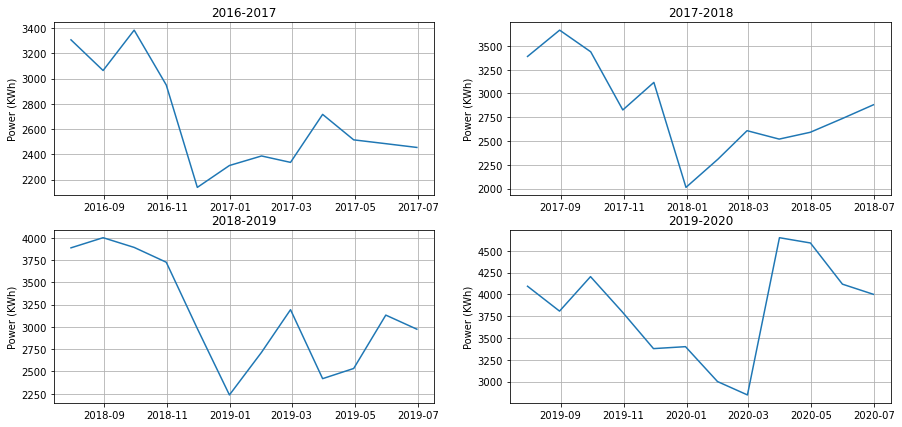

In [8]:
# By looking at the plots, it's clear that there are some mistakes in the data
# These "outliers" data points are substituted with the mean-power value of the previous and the next month with respect to the wrong data point

df_16_17_month.loc[['2017-05-31']] = np.round(np.mean((df_16_17_month.loc[['2017-04-30']],df_16_17_month.loc[['2017-06-30']]))) 

df_17_18_month.loc[['2018-05-31']] = np.round(np.mean((df_17_18_month.loc[['2018-04-30']],df_17_18_month.loc[['2018-06-30']]))) 
df_17_18_month.loc[['2018-01-31']] = np.round(np.mean((df_17_18_month.loc[['2017-12-31']],df_17_18_month.loc[['2018-02-28']])))

df_18_19_month.loc[['2018-11-30']] = np.round(np.mean((df_18_19_month.loc[['2018-10-31']],df_18_19_month.loc[['2018-12-31']])))
df_18_19_month.loc[['2019-01-31']] = np.round(np.mean((df_18_19_month.loc[['2018-12-31']],df_18_19_month.loc[['2019-02-28']])))

df_19_20_month.loc[['2019-12-31']] = 3400
#np.round(np.mean((df_19_20.groupby(pd.Grouper(level='Time',freq='M')).mean().loc[['2019-11-30']],df_19_20.groupby(pd.Grouper(level='Time',freq='M')).mean().loc[['2020-01-31']])))
df_19_20_month.loc[['2020-01-31']] = 3000
#np.round(np.mean((df_19_20.groupby(pd.Grouper(level='Time',freq='M')).mean().loc[['2019-12-31']],df_19_20.groupby(pd.Grouper(level='Time',freq='M')).mean().loc[['2020-02-31']])))
df_19_20_month.loc[['2020-06-30']] = 4000
#np.round(np.mean((df_19_20.groupby(pd.Grouper(level='Time',freq='M')).mean().loc[['2020-05-31']],df_19_20.groupby(pd.Grouper(level='Time',freq='M')).mean().loc[['2020-01-31']])))


# Once these values have been imputated, we can plot again the Power trends

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

ax[0,0].plot(df_16_17_month)
ax[0,0].set_title('2016-2017')
ax[0,0].set_ylabel('Power (KWh)')
ax[0,0].grid()

ax[0,1].plot(df_17_18_month)
ax[0,1].set_title('2017-2018')
ax[0,1].set_ylabel('Power (KWh)')
ax[0,1].grid()

ax[1,0].plot(df_18_19_month)
ax[1,0].set_title('2018-2019')
ax[1,0].set_ylabel('Power (KWh)')
ax[1,0].grid()
ax[1,1].plot(df_19_20_month)
ax[1,1].set_title('2019-2020')
ax[1,1].set_ylabel('Power (KWh)')
ax[1,1].grid()

plt.show()

Text(0, 0.5, 'Power (KWh)')

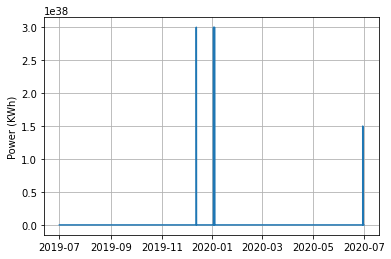

In [9]:
# We can now analyze in detail the year range 2019/2020, by plotting its power trend over the entire period

plt.plot(df_19_20.Power)
plt.grid()
plt.ylabel('Power (KWh)')

In [10]:
# It can be seen that there are still some "outlier" data. This is because the substitutions made before
# were performed on a newly defined list and not on the orginal data. So, as before, we substitute them with 
# the mean power of the previous and the next value

# At first we identify these data points
df_19_20[df_19_20.Power > 50000000]

,Power
Time,
2019-12-12 14:39:00,3.000000e+38
2020-01-02 08:19:00,3.000000e+38
2020-01-03 11:15:00,3.000000e+38
2020-06-29 17:49:00,1.500000e+38


In [11]:
# Then we can substitute them as expalined before (mean values have been evaluated in a separeted chunk)

df_19_20.loc['2019-12-12 14:39:00'] = np.round(np.mean((df_19_20.loc[['2019-12-12 14:38:00']],df_19_20.loc[['2019-12-12 14:40:00']])))
df_19_20.loc['2020-01-02 08:19:00'] = np.round(np.mean((df_19_20.loc[['2020-01-02 08:18:00']],df_19_20.loc[['2020-01-02 08:20:00']])))
df_19_20.loc['2020-01-03 11:15:00'] = np.round(np.mean((df_19_20.loc[['2020-01-03 11:08:00']],df_19_20.loc[['2020-01-03 11:16:00']])))
df_19_20.loc['2020-06-29 17:49:00'] = np.round(np.mean((df_19_20.loc[['2020-06-29 17:48:00']],df_19_20.loc[['2020-06-29 17:50:00']])))

Text(0, 0.5, 'Power (KWh)')

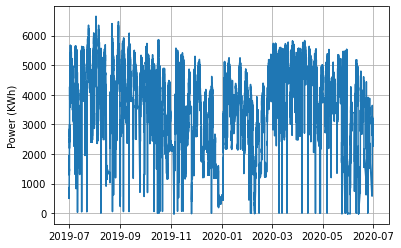

In [12]:
# Now we can better see the power trend for the year range 2019/2020

plt.plot(df_19_20.Power)
plt.grid()
plt.ylabel('Power (KWh)')

In [13]:
# Still, there are some negative values of Power which are meaningless, therefore we procede by dropping them

df_19_20[df_19_20.Power < 0]

index_names = df_19_20[ df_19_20['Power'] < 0 ].index
  
# drop these row indexes
# from dataFrame
df_19_20.drop(index_names, inplace = True)

Text(0, 0.5, 'Power (KWh)')

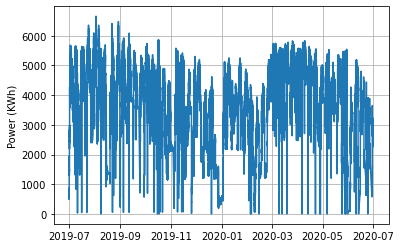

In [14]:
# Finally we get the right plot

plt.plot(df_19_20.Power)
plt.grid()
plt.ylabel('Power (KWh)')

In [ ]:
# Uncomment the following line in the chunk when run the notebook for the first time, in order to
# save the cleaned dataset obtained in the preprocessing phase

#df_19_20.to_csv('cleaned_2019-2020.csv')

In [ ]:
# Stationarity test check

# The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
# The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.
# There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. 
# It uses an autoregressive model and optimizes an information criterion across multiple different lag values.
# The null hypothesis of the test is that the time series can be represented by a unit root, 
# that it is not stationary (has some time-dependent structure). 
# The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

# the more the statistic value is negative, the more likely is that the time series is stationary



result = adfuller(df_19_20['Power'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
# H0: the time series is non-stationary (time series has a unit root)
# H1: the time series is stationary (time series has not a unit root)
# As the test suggest, and the previous plot suggest as well, we are confident in rejecting the Null-hypothesis
# at a 1% confidence level

# That is in conclusion, the time series is STATIONARY

In [16]:
# Seasonal decomposition using moving averages.

# The results are obtained by first estimating the trend by applying
# a convolution filter to the data. The trend is then removed from the
# series and the average of this de-trended series for each period is
# the returned seasonal component.
    
    
# Now we decompose the data series into its components: trend + seasonal + noise (an additive decomposition has been used)
# The additive model is appropriate if the magnitude (amplitude) of the seasonal variation does not vary with the level of the series

result=seasonal_decompose(df_19_20, model='additive',freq=43200,extrapolate_trend=43200) 

# freq = 43200, below is explained the choice
# freq = ((24h*60min) / resolution in min (in this case 1 min) ) * desired seasonality  : 30 days

/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  # This is added back by InteractiveShellApp.init_path()


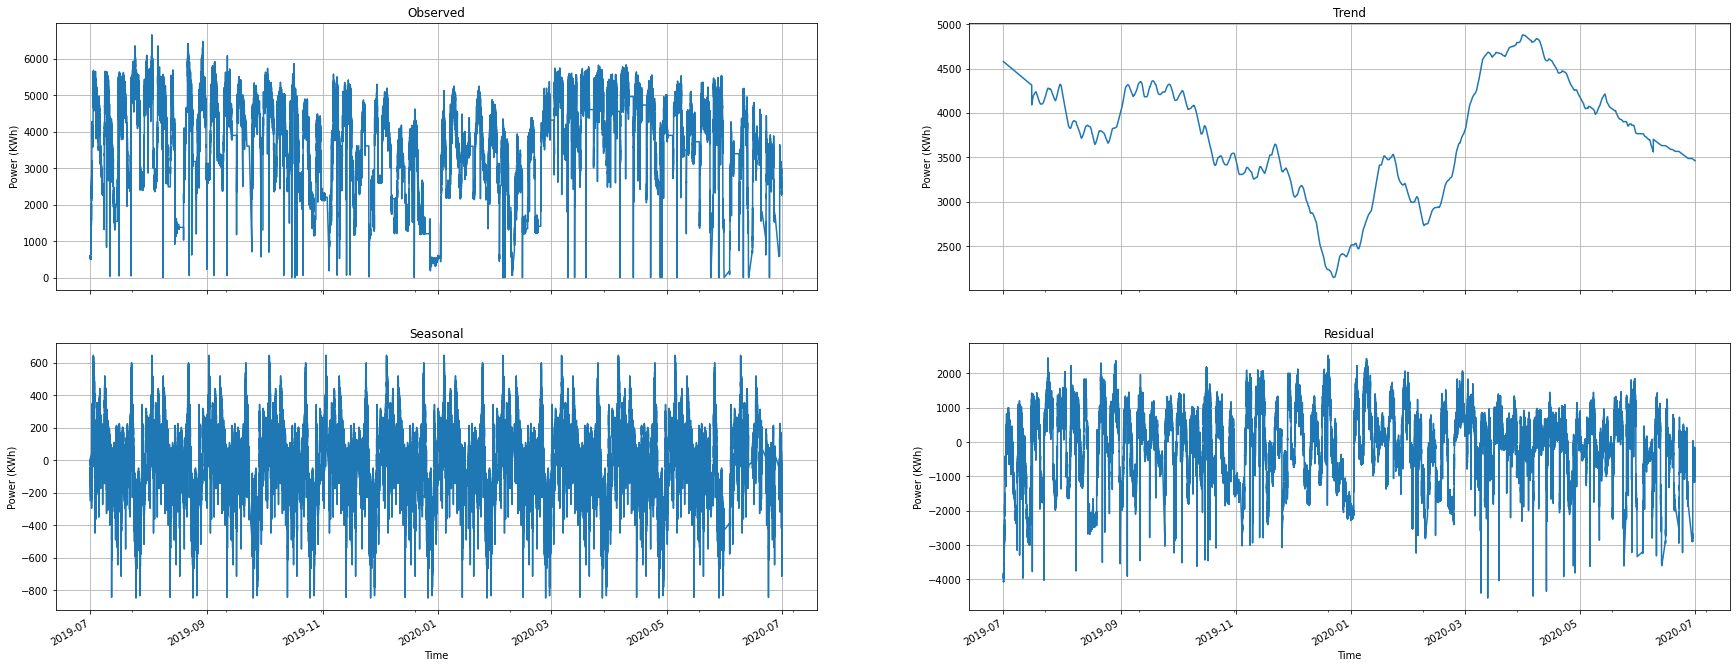

In [17]:
# Here we plot the results of the Decomposition

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(30,12))

result.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_title('Observed')
axes[0,0].set_ylabel('Power (KWh)')
axes[0,0].grid()
result.trend.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Trend')
axes[0,1].set_ylabel('Power (KWh)')
axes[0,1].grid()
result.seasonal.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Seasonal')
axes[1,0].set_ylabel('Power (KWh)')
axes[1,0].grid()
result.resid.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Residual')
axes[1,1].set_ylabel('Power (KWh)')
axes[1,1].grid()

plt.show()

In [18]:
# To better analyze the time series, we can think of consider a more time-aggregate time series, so we can
# consider a weekly aggregation

Text(0, 0.5, 'Power (KWh)')

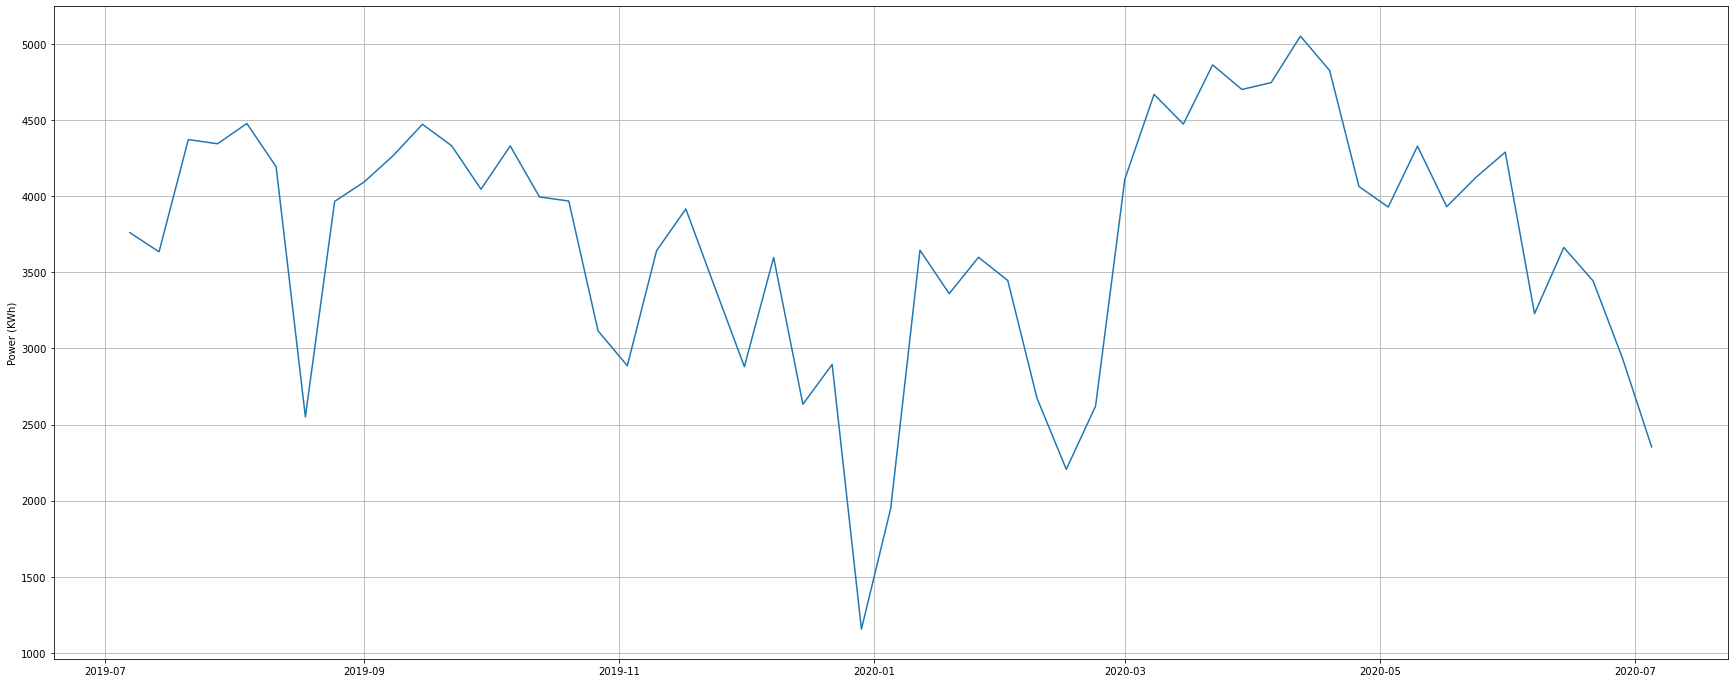

In [19]:
df_weekly = df_19_20.groupby(pd.Grouper(level='Time',freq='W')).mean()

#num_var = df_weekly.columns[df_weekly.dtypes != 'object']
#df_weekly[num_var].isnull().sum()

fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=(30,12))
plt.plot(df_weekly)
plt.grid()
plt.ylabel('Power (KWh)')

In [20]:
#df_weekly = df_weekly.dropna()
#num_var = df_weekly.columns[df_weekly.dtypes != 'object']
#df_weekly[num_var].isnull().sum()

/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


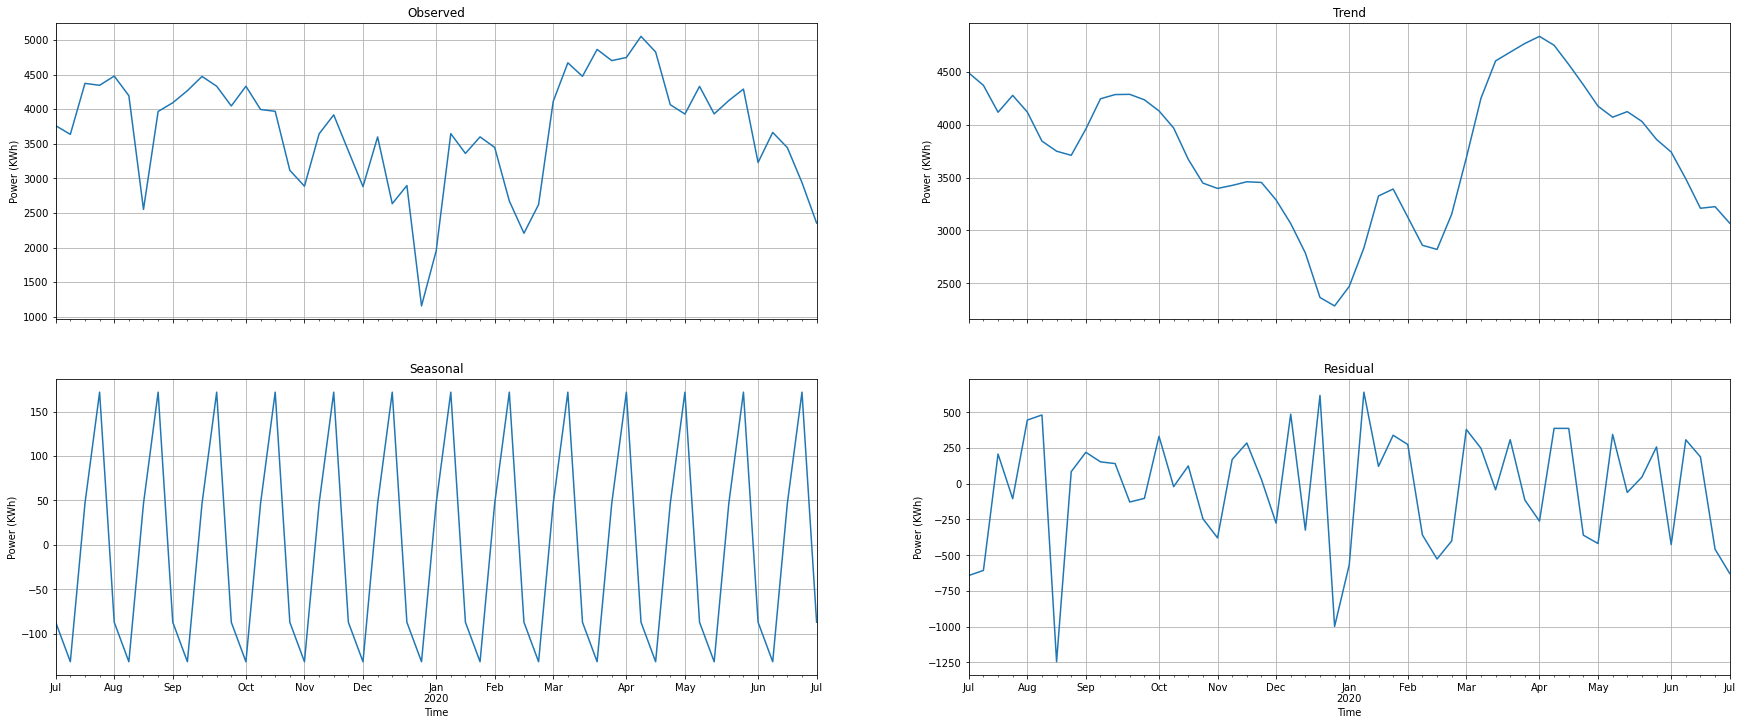

In [21]:
# we cosider here a freq of 4 which correspond to a desired seasonality of 30 days

result=seasonal_decompose(df_weekly, model='additive',freq=4,extrapolate_trend=4) 
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(30,12))

result.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_title('Observed')
axes[0,0].set_ylabel('Power (KWh)')
axes[0,0].grid()
result.trend.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Trend')
axes[0,1].set_ylabel('Power (KWh)')
axes[0,1].grid()
result.seasonal.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Seasonal')
axes[1,0].set_ylabel('Power (KWh)')
axes[1,0].grid()
result.resid.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Residual')
axes[1,1].set_ylabel('Power (KWh)')
axes[1,1].grid()

plt.show()


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

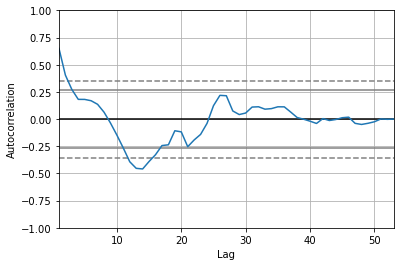

In [22]:
# We can now investigate seasonality of time series with an autocorrelation plot


autocorrelation_plot(df_weekly)

# From the plot, we have just few significant data points, (the ones that are over the 95% confidence interval)
# This leads us to consider this process as a randomic one.

# for what concerne seasonality,
# There don't seem to be spikes present in a regular way -> No "clear" seasonal effect
# This is to confirm with the other (below)  plot

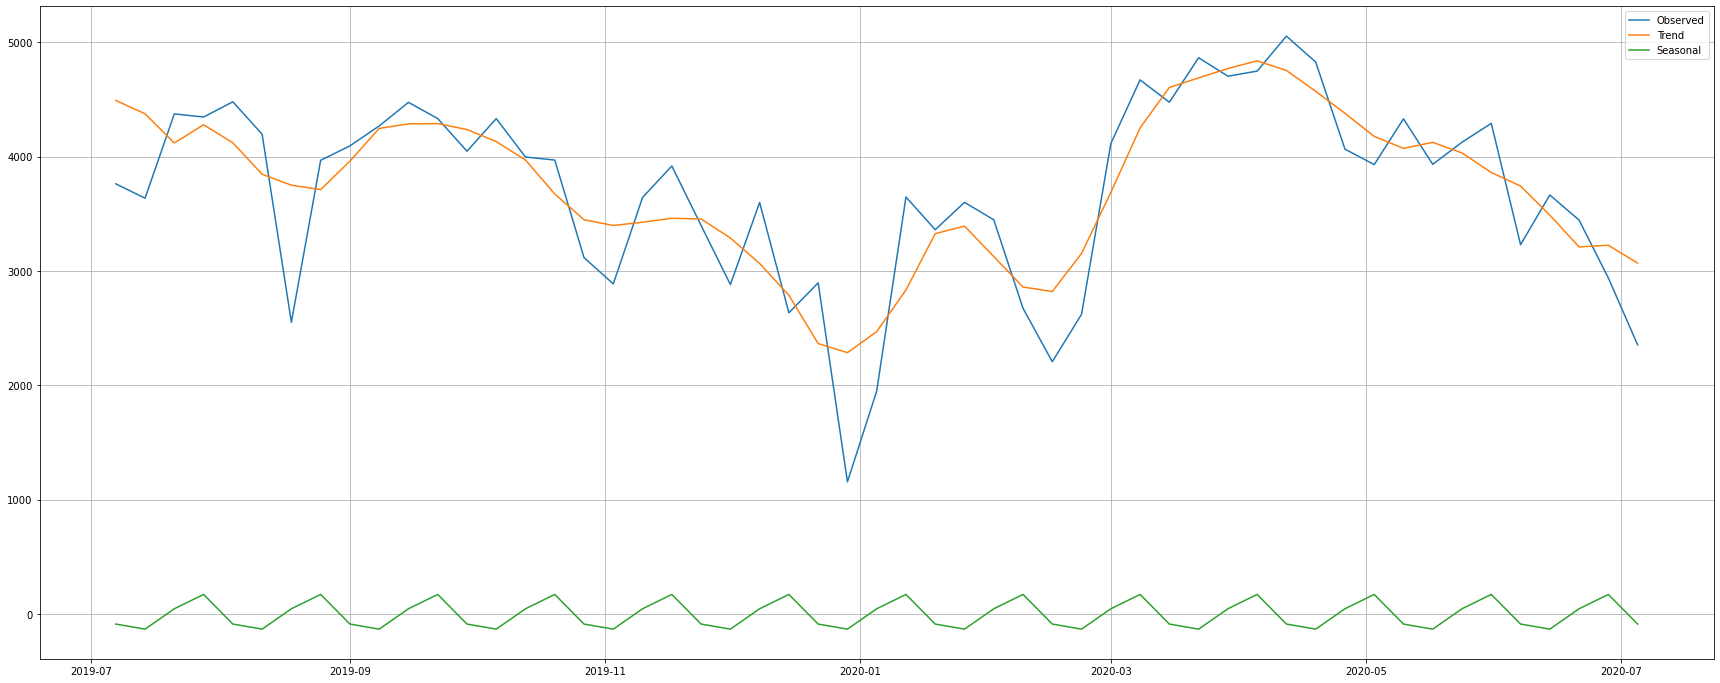

In [23]:
# Indeed, since we are dealing with a real process, it' often difficult to detect seasonality, (even because ACF 
# takes into account trend and seasonality and bias)
# from the autocorrelation plot, therefore we can better visualize seasonality by plotting the results within 
# one single plot

fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=(30,12))
plt.plot(result.observed, label='Observed')
plt.plot(result.trend,label='Trend')
plt.plot(result.seasonal,label='Seasonal')
plt.grid()
plt.legend()

In [24]:
# From the plot above, we can appreciate a seasonal effect in the data. In particular, it seems like 
# in the first week of the month seasonality cause a minor consumption of Power. Then, in the middle of the 
# month seasonality leads to an increase of power consumption and finally it decrease again in the last week 
# of the month


/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  del sys.path[0]


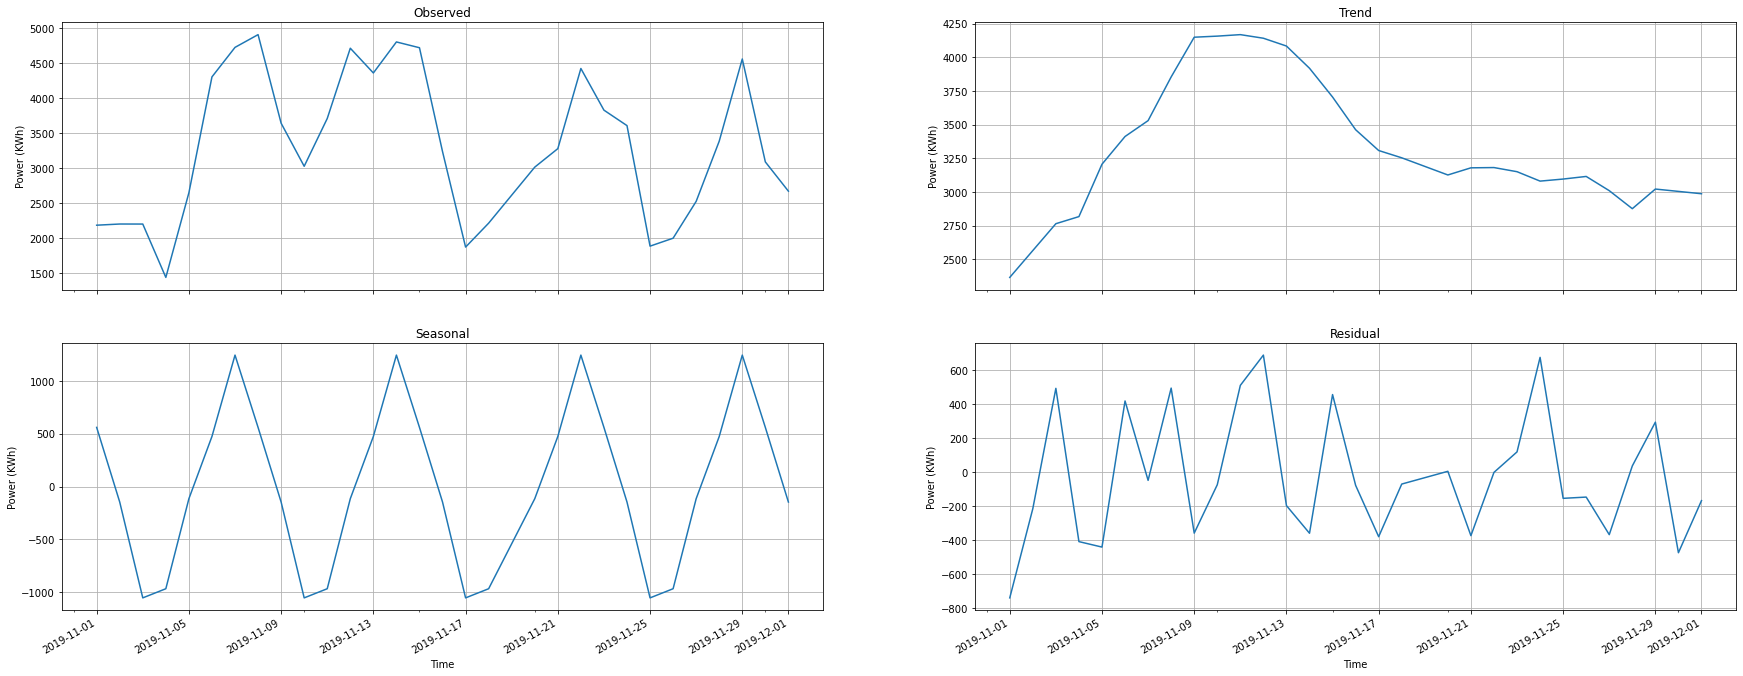

In [27]:
# In order to have a more detail description for the months that will be interested by the forecasting process
# 11-2019 , 01-2020 , 06-2020, we now procede with a seasonal decomposition by day, regarding the periods of these months

# dataset 0

df = df_19_20.groupby(pd.Grouper(level='Time',freq='D')).mean()

pos = df.index.get_loc('2019-11-01')
nov_19 = df.iloc[pos:(pos+31)]

nov_19 = nov_19.dropna()
num_var = nov_19.columns[nov_19.dtypes != 'object']
nov_19[num_var].isnull().sum()

result=seasonal_decompose(nov_19, model='additive',freq=7,extrapolate_trend=7) 
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(30,12))

result.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_title('Observed')
axes[0,0].set_ylabel('Power (KWh)')
axes[0,0].grid()
result.trend.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Trend')
axes[0,1].set_ylabel('Power (KWh)')
axes[0,1].grid()
result.seasonal.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Seasonal')
axes[1,0].set_ylabel('Power (KWh)')
axes[1,0].grid()
result.resid.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Residual')
axes[1,1].set_ylabel('Power (KWh)')
axes[1,1].grid()

plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

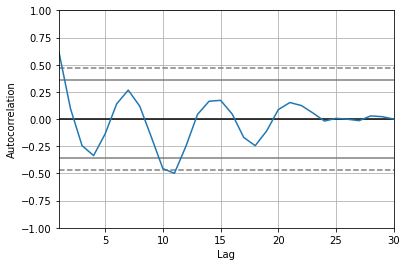

In [28]:
autocorrelation_plot(nov_19)

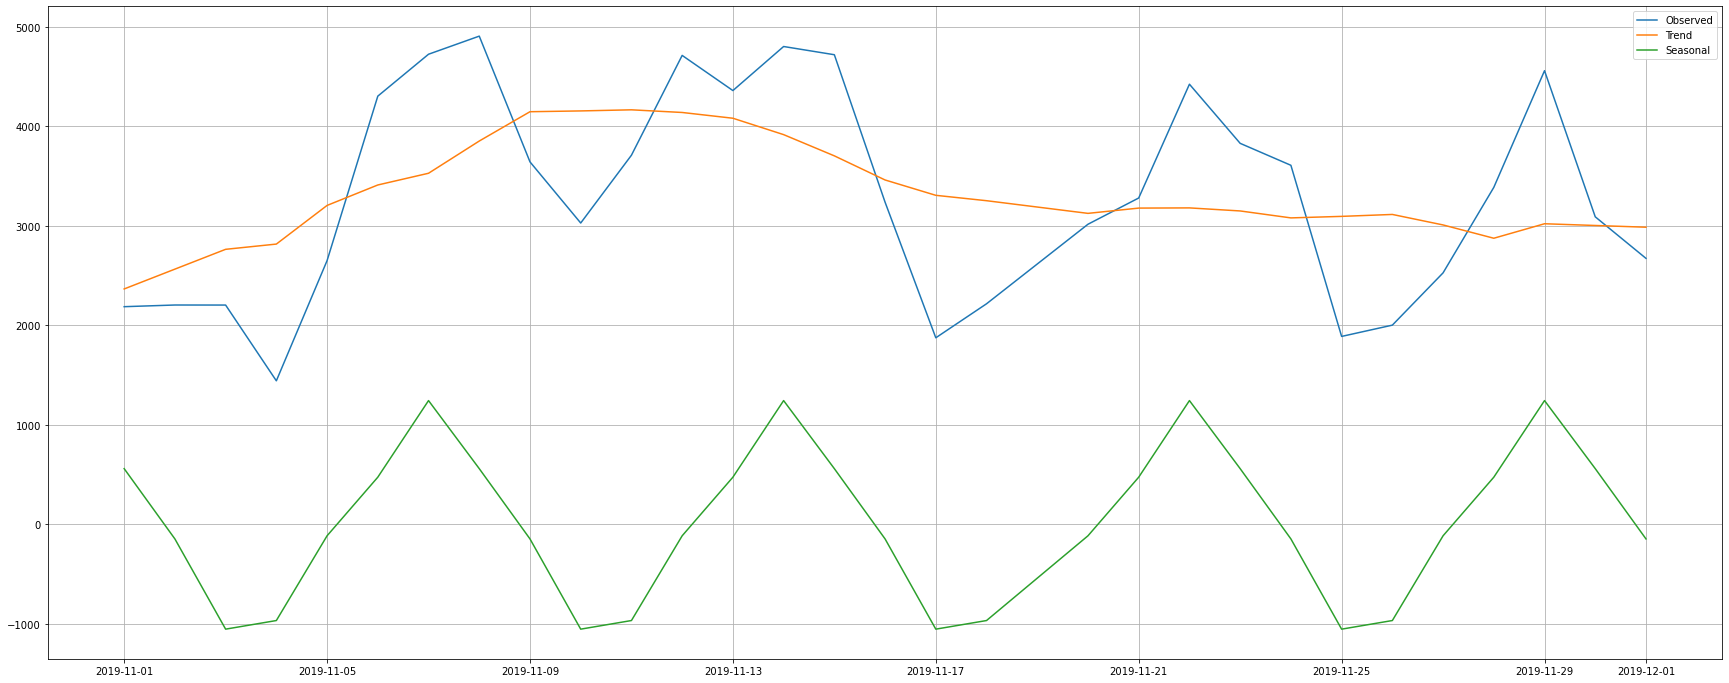

In [29]:
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=(30,12))
plt.plot(result.observed, label='Observed')
plt.plot(result.trend,label='Trend')
plt.plot(result.seasonal,label='Seasonal')
plt.grid()
plt.legend()

/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  del sys.path[0]


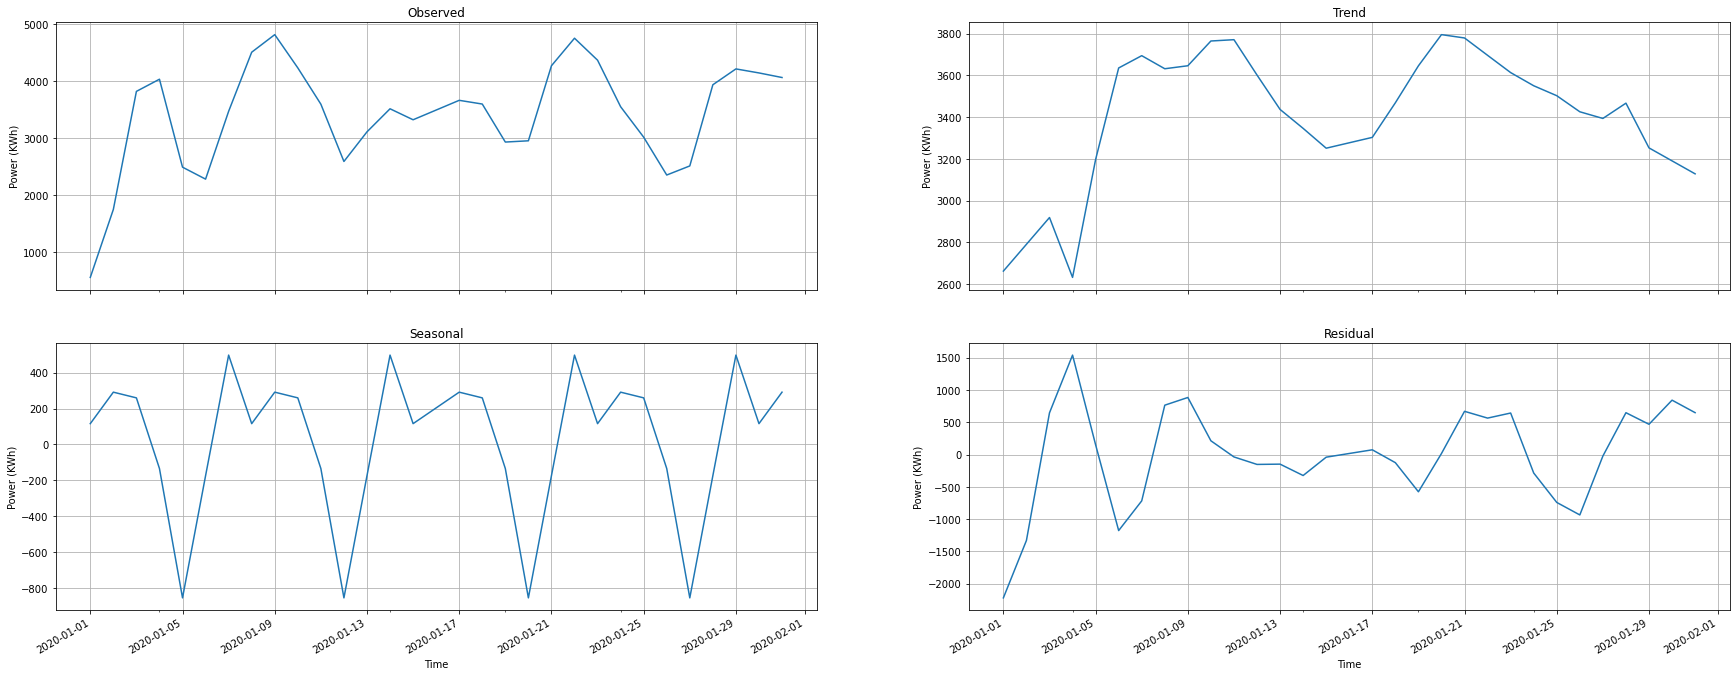

In [26]:
# dataset 1
df = df_19_20.groupby(pd.Grouper(level='Time',freq='D')).mean()

pos = df.index.get_loc('2020-01-01')
jen_20 = df.iloc[pos:(pos+31)]

jen_20 = jen_20.dropna()
num_var = jen_20.columns[jen_20.dtypes != 'object']
jen_20[num_var].isnull().sum()

result=seasonal_decompose(jen_20, model='additive',freq=7,extrapolate_trend=7) 
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(30,12))

result.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_title('Observed')
axes[0,0].set_ylabel('Power (KWh)')
axes[0,0].grid()
result.trend.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Trend')
axes[0,1].set_ylabel('Power (KWh)')
axes[0,1].grid()
result.seasonal.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Seasonal')
axes[1,0].set_ylabel('Power (KWh)')
axes[1,0].grid()
result.resid.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Residual')
axes[1,1].set_ylabel('Power (KWh)')
axes[1,1].grid()

plt.show()



In [ ]:
# the trend presented is quite similar to the one previously observed.

In [ ]:
autocorrelation_plot(jen_20)

In [ ]:
# No significant data points (above or below confidence interval) are present
# That is the process is strictily randomic

# an additional information we can gather is that this process seems more like an AR process

# as before, since it's a real process, we plot all result in one graph to better visualize seasonal effects 
# even if a light one is kind of visible already here

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=(30,12))
plt.plot(result.observed, label='Observed')
plt.plot(result.trend,label='Trend')
plt.plot(result.seasonal,label='Seasonal')
plt.grid()
plt.legend()

In [ ]:
# dataset 2

pos = df.index.get_loc('2020-06-01')
june_20 = df.iloc[pos:(pos+30)]
june_20

june_20 = june_20.dropna()
num_var = june_20.columns[june_20.dtypes != 'object']
june_20[num_var].isnull().sum()

result=seasonal_decompose(june_20, model='additive',freq=7,extrapolate_trend=7) 
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(30,12))

result.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_title('Observed')
axes[0,0].set_ylabel('Power (KWh)')
axes[0,0].grid()
result.trend.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Trend')
axes[0,1].set_ylabel('Power (KWh)')
axes[0,1].grid()
result.seasonal.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Seasonal')
axes[1,0].set_ylabel('Power (KWh)')
axes[1,0].grid()
result.resid.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Residual')
axes[1,1].set_ylabel('Power (KWh)')
axes[1,1].grid()

plt.show()


In [ ]:
# the trend in this case seems to change a bit, showing mainly a downward orientation
# following plots 

In [ ]:
autocorrelation_plot(june_20)

In [ ]:
# almost same consideration as before, but here we can clearly spot some peaks (add seasonality considerations)

# the process is highly stochastic since all the values fall within the confidence interval

# Looking at the plot this process could be tought to be an AR

# as before, since it's a real process, we plot all result in one graph to better visualize seasonal effects
# even if a light one is kind of visible already here

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=(30,12))
plt.plot(result.observed, label='Observed')
plt.plot(result.trend,label='Trend')
plt.plot(result.seasonal,label='Seasonal')
plt.grid()
plt.legend()

## Forecasting
### Dates to forecast: 19/11/2019, 16/01/2020, 18/06/2020

### All the forecasting process should be performed on hourly aggregate data, since the final output required by FATER is a table which tells hour-by-hour the power required in that day

For this part, we are going to consider several models for data predictions, from the classical ARIMA models among which cose the proper ones, to the more "complex" usage of a deep neural network like LSTM approach 


in particular, we will split the dataset into three sub-dataset which correspond to a give time-rage before each of the three dates to forecast

In [15]:
# split data into train and test

df_hourly = df_19_20.groupby(pd.Grouper(level='Time',freq='H')).mean()
df_hourly = df_hourly.dropna()


df_hourly_0 = df_hourly['2019-08-18':'2019-11-18']
df_hourly_1 = df_hourly['2019-10-15':'2020-01-15']
df_hourly_2 = df_hourly['2020-03-17':'2020-06-17']

train0_size = int(len(df_hourly_0)*0.8)
train0 = df_hourly_0[:train0_size]
test0 = df_hourly_0[train0_size+1:]

train1_size = int(len(df_hourly_1)*0.8)
train1 = df_hourly_1[:train1_size]
test1 = df_hourly_1[train1_size+1:]

train2_size = int(len(df_hourly_2)*0.8)
train2 = df_hourly_2[:train2_size]
test2 = df_hourly_2[train2_size+1:]

### SARIMA (check for the model type on dataset 0)


While exponential smoothing models use weighted averages of past observations to forecast new values, Auto-Regressive Integrated Moving Average or ARIMA models look at autocorrelations or serial correlations in the data. In other words, ARIMA models look at differences between values in the time series. SARIMA builds upon the concept of ARIMA but extends it to model the seasonal elements in your data. 

/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


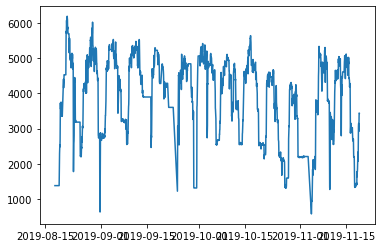

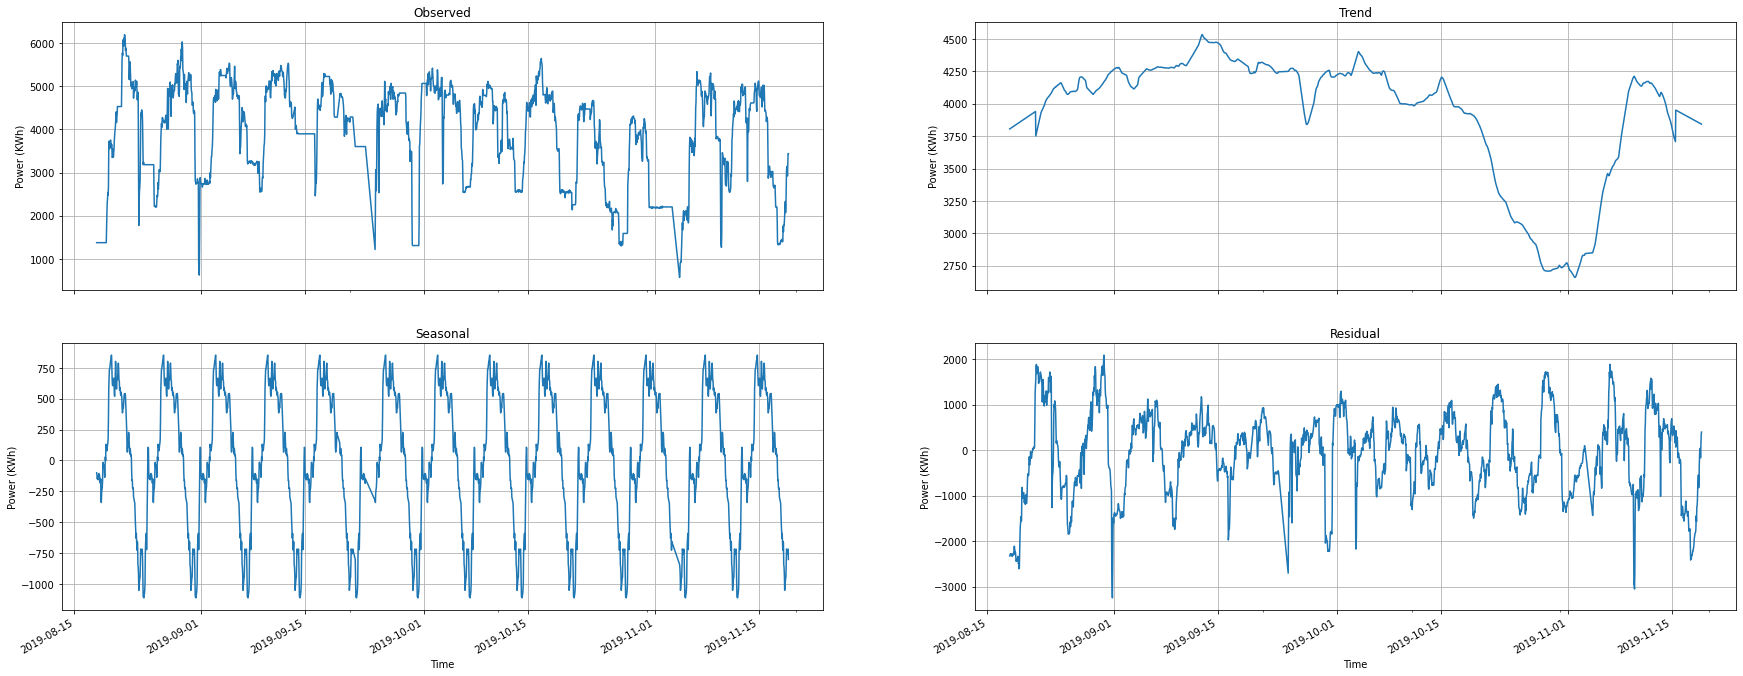

In [16]:
plt.plot(df_hourly_0)
result=seasonal_decompose(df_hourly_0, model='additive',freq=168,extrapolate_trend=168) 
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(30,12))

result.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_title('Observed')
axes[0,0].set_ylabel('Power (KWh)')
axes[0,0].grid()
result.trend.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Trend')
axes[0,1].set_ylabel('Power (KWh)')
axes[0,1].grid()
result.seasonal.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Seasonal')
axes[1,0].set_ylabel('Power (KWh)')
axes[1,0].grid()
result.resid.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Residual')
axes[1,1].set_ylabel('Power (KWh)')
axes[1,1].grid()

plt.show()

In [17]:
# seems like there is a Seasonal component
# the following test check for stationarity

In [18]:
result = adfuller(df_hourly_0['Power'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.201462
p-value: 0.000009
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


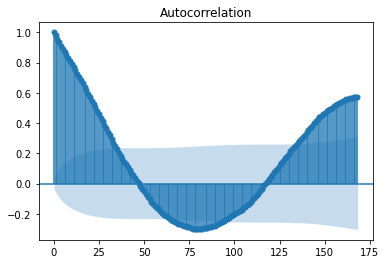

In [19]:
# autocorrelation plot to get the parameters for the model

fig = sm.graphics.tsa.plot_acf(df_hourly_0, lags=168)
plt.show()

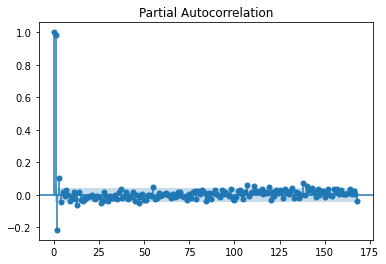

In [20]:
fig = sm.graphics.tsa.plot_pacf(df_hourly_0, lags=168)
plt.show()

#### MODEL PARAMETERS 
 Here are reported the possible setting for the SARIMA model parameters

SARIMA(1,0,1)x(1,1,0)m=168 RMSE: 1053.469 --- BEST ONE ---

SARIMA(1,0,0)x(1,1,0)m=168 RMSE: 1070.881

SARIMA(1,0,1)x(1,0,0)m=168 RMSE: 1250.180

SARIMA(1,0,1)x(2,0,0)m=168 RMSE: 1233.957

SARIMA(1,0,0)x(2,0,0)m=168 RMSE: 1220.544

SARIMA(1,0,0)x(1,0,0)m=168 RMSE: 1241.045

In [36]:
# best model considering the seasonality
model=sm.tsa.statespace.SARIMAX(endog=train0,order=(1,0,1),seasonal_order=(1,1,0,168),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                Power   No. Observations:                 1732
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 168)   Log Likelihood              -10805.297
Date:                              Thu, 02 Sep 2021   AIC                          21620.595
Time:                                      14:59:20   BIC                          21647.370
Sample:                                           0   HQIC                         21630.549
                                             - 1732                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7869      7.417      0.241      0.810     -12.750      16.324
ar.L1          0.95

In [37]:
test0['predicts'] = results.forecast(len(test0)).values

/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
test0

,Power,predicts
Time,,
2019-10-31 01:00:00,3270.641667,3339.457871
2019-10-31 02:00:00,3288.250000,3439.535681
2019-10-31 03:00:00,3302.241667,3495.009653
2019-10-31 04:00:00,3288.050000,3489.126539
2019-10-31 05:00:00,2477.791667,3511.733782
...,...,...
2019-11-18 19:00:00,3140.325000,2014.012635
2019-11-18 20:00:00,2922.291667,2020.360523
2019-11-18 21:00:00,3173.866667,1907.180490


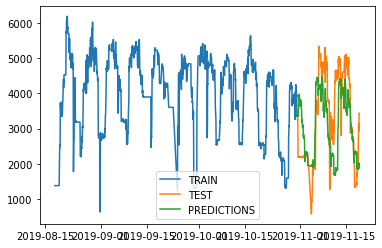

In [39]:
plt.plot(train0.Power,label='TRAIN')
plt.plot(test0.Power,label='TEST')
plt.plot(test0.predicts,label='PREDICTIONS')
plt.legend()
plt.show()

In [40]:
rmse = sqrt(mean_squared_error(test0.Power,test0.predicts))
print('RMSE: %.3f' % rmse)

max_value = df_hourly_0.Power.max() - df_hourly_0.Power.min()
print('Model Fit %:',np.round((1-(rmse/max_value)) * 100))

RMSE: 1053.469
Model Fit %: 81.0


### SARIMA (check for the model type on dataset 1)


In [ ]:
plt.plot(df_hourly_1)
result=seasonal_decompose(df_hourly_1, model='additive',freq=168,extrapolate_trend=168) 
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(30,12))

result.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_title('Observed')
axes[0,0].set_ylabel('Power (KWh)')
axes[0,0].grid()
result.trend.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Trend')
axes[0,1].set_ylabel('Power (KWh)')
axes[0,1].grid()
result.seasonal.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Seasonal')
axes[1,0].set_ylabel('Power (KWh)')
axes[1,0].grid()
result.resid.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Residual')
axes[1,1].set_ylabel('Power (KWh)')
axes[1,1].grid()

plt.show()



In [ ]:
# seems like there is a Seasonal component
# the following test check for stationarity

In [ ]:
result = adfuller(df_hourly_1['Power'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
# autocorrelation plot to get the parameters for the model
fig = sm.graphics.tsa.plot_acf(df_hourly_1, lags=168)
plt.show()

In [ ]:
fig = sm.graphics.tsa.plot_pacf(df_hourly_1, lags=168)
plt.show()

#### Model parameters

SARIMA(1,0,1)x(1,1,0)m=168 RMSE: 2122.176 

SARIMA(1,0,1)x(2,1,0)m=168 RMSE: 1787.081

SARIMA(1,0,0)x(2,1,0)m=168 RMSE: 1717.112

SARIMA(1,0,0)x(1,1,0)m=168 RMSE: 2116.056 

SARIMA(1,0,1)x(1,0,0)m=168 RMSE: 1140.496 -- BEST ONE ---

SARIMA(1,0,1)x(2,0,0)m=168 RMSE: 1171.202

SARIMA(1,0,0)x(2,0,0)m=168 RMSE: 1183.151

SARIMA(1,0,0)x(1,0,0)m=168 RMSE: 1150.870


In [ ]:
# best model considering the seasonality
model=sm.tsa.statespace.SARIMAX(endog=train1,order=(1,0,1),seasonal_order=(1,0,0,168),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

In [ ]:
test1['predicts'] = results.forecast(len(test1)).values

In [ ]:
test1

In [ ]:
plt.plot(train1.Power,label='TRAIN')
plt.plot(test1.Power,label='TEST')
plt.plot(test1.predicts,label='PREDICTIONS')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test1.Power,test1.predicts))
print('RMSE: %.3f' % rmse)

max_value = df_hourly_1.Power.max() - df_hourly_1.Power.min()
print('Model Fit %:',np.round((1-(rmse/max_value)) * 100))

### SARIMA (check for the model type on dataset 2)

In [ ]:
plt.plot(df_hourly_2)
result=seasonal_decompose(df_hourly_2, model='additive',freq=168,extrapolate_trend=168) 
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(30,12))

result.observed.plot(ax=axes[0,0], legend=False)
axes[0,0].set_title('Observed')
axes[0,0].set_ylabel('Power (KWh)')
axes[0,0].grid()
result.trend.plot(ax=axes[0,1], legend=False)
axes[0,1].set_title('Trend')
axes[0,1].set_ylabel('Power (KWh)')
axes[0,1].grid()
result.seasonal.plot(ax=axes[1,0], legend=False)
axes[1,0].set_title('Seasonal')
axes[1,0].set_ylabel('Power (KWh)')
axes[1,0].grid()
result.resid.plot(ax=axes[1,1], legend=False)
axes[1,1].set_title('Residual')
axes[1,1].set_ylabel('Power (KWh)')
axes[1,1].grid()

plt.show()

In [ ]:
# There is a seasonal component
# the following code check for stationarity

In [ ]:
result = adfuller(df_hourly_2['Power'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [ ]:
# autocorrelation plot to get the parameters for the model

fig = sm.graphics.tsa.plot_acf(df_hourly_2, lags=168)
plt.show()

In [ ]:

fig = sm.graphics.tsa.plot_pacf(df_hourly_2, lags=168)
plt.show()

#### Model parameter

SARIMA(1,0,1)x(1,1,0)m=168 RMSE: 1394.660

SARIMA(1,0,1)x(2,1,0)m=168 RMSE: 1392.458

SARIMA(1,0,0)x(2,1,0)m=168 RMSE: 1330.260

SARIMA(1,0,0)x(1,1,0)m=168 RMSE: 1448.291

SARIMA(1,0,1)x(1,0,0)m=168 RMSE: 1282.360

SARIMA(1,0,1)x(2,0,0)m=168 RMSE: 1268.632 -- BEST ONE --

SARIMA(1,0,0)x(2,0,0)m=168 RMSE: 1274.720

SARIMA(1,0,0)x(1,0,0)m=168 RMSE: 1291.999
    


In [ ]:
# best model considering the seasonality
model=sm.tsa.statespace.SARIMAX(endog=train2,order=(1,0,1),seasonal_order=(2,0,0,168),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

In [ ]:
test2['predicts'] = results.forecast(len(test2)).values

In [ ]:
test2

In [ ]:
plt.plot(train2.Power,label='TRAIN')
plt.plot(test2.Power,label='TEST')
plt.plot(test2.predicts,label='PREDICTIONS')
plt.legend()
plt.show()

In [ ]:
rmse = sqrt(mean_squared_error(test2.Power,test2.predicts))
print('RMSE: %.3f' % rmse)

max_value = df_hourly_2.Power.max() - df_hourly_2.Power.min()
print('Model Fit %:',np.round((1-(rmse/max_value)) * 100))

### Holt-Winters’

In [ ]:
# dataset 0

/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/Users/andrea/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWa

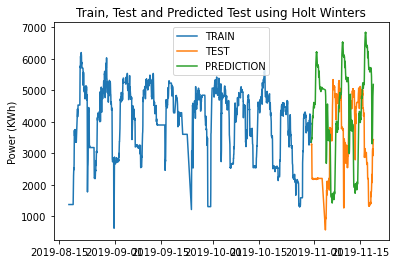

In [41]:
fitted_model = ExponentialSmoothing(train0.Power,trend='add',seasonal='add',seasonal_periods=168).fit(optimized=True)
test0['predictions'] = fitted_model.forecast(len(test0)).values
plt.plot(train0.Power,label='TRAIN')
plt.plot(test0.Power,label='TEST')
plt.plot(test0.predictions,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.ylabel('Power (KWh)')
plt.legend()
plt.show()

In [43]:

rmse = sqrt(mean_squared_error(test0.Power, test0.predictions))
print('RMSE: %.3f' % rmse)

max_value = df_hourly_0.Power.max() - df_hourly_0.Power.min()
print('Model Fit %:',np.round((1-(rmse/max_value)) * 100))

RMSE: 2473.686
Model Fit %: 56.0


In [1]:
# Dataset 1

In [ ]:



fitted_model = ExponentialSmoothing(train1.Power,trend='add',seasonal='add',seasonal_periods=168).fit(optimized=True)
test1['predictions'] = fitted_model.forecast(len(test1)).values
plt.plot(train1.Power,label='TRAIN')
plt.plot(test1.Power,label='TEST')
plt.plot(test1.predictions,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.ylabel('Power (KWh)')
plt.legend()
plt.show()


In [ ]:

rmse = sqrt(mean_squared_error(test1.Power, test1.predictions))
print('RMSE: %.3f' % rmse)

max_value = df_hourly_1.Power.max() - df_hourly_1.Power.min()
print('Model Fit %:',np.round((1-(rmse/max_value)) * 100))

In [ ]:
# The result is comparable to the more classic (S)ARIMA model fitted before

In [ ]:
# Dataset 2

In [ ]:


fitted_model = ExponentialSmoothing(train2.Power,trend='add',seasonal='add',seasonal_periods=(168)).fit(optimized=True)
test2['predictions'] = fitted_model.forecast(len(test2)).values
plt.plot(train2.Power,label='TRAIN')
plt.plot(test2.Power,label='TEST')
plt.plot(test2.predictions,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.ylabel('Power (KWh)')
plt.legend()
plt.show()

In [ ]:

rmse = sqrt(mean_squared_error(test2.Power, test2.predictions))
print('RMSE: %.3f' % rmse)

max_value = df_hourly_2.Power.max() - df_hourly_2.Power.min()
print('Model Fit %:',np.round((1-(rmse/max_value)) * 100))

### LSTM 
### LSTM has been implemented in the other notebook 'LSTM_MULTI-STEP_POWER_FORECAST'

